/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars


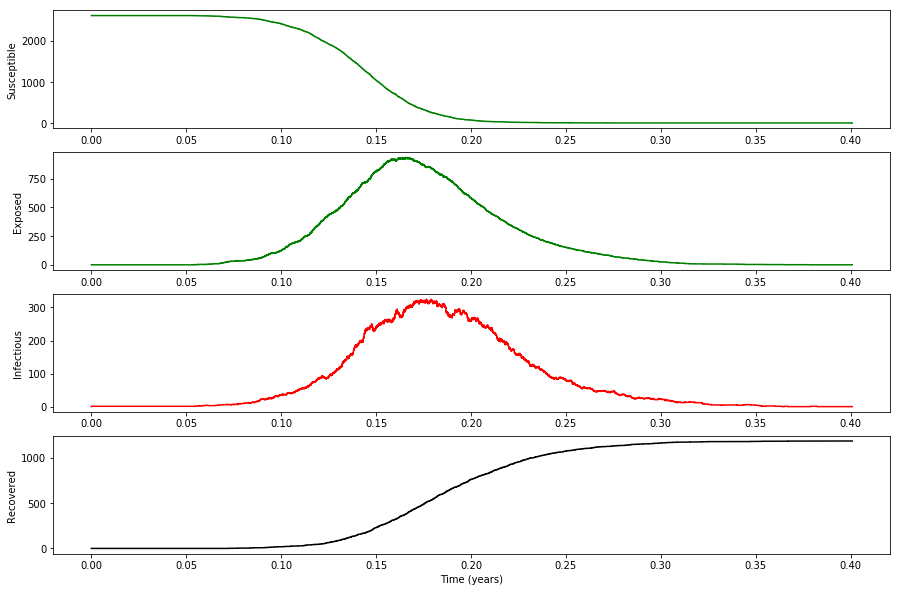

In [1]:
import numpy as np
import pylab as pl

beta=1.0

gamma=1/10.0
sigma=1/12.0
mu=5e-4
N0=2618.0
mu_d=1/20
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=1*365.0
mort=334/2618
# X0=pl.floor(gamma*N0/beta)
# Y0=pl.ceil(mu*N0/gamma)
# Z0=N0-X0-Y0
W0=N0-1
X0=1
Y0=0
Z0=0
INPUT = np.array((W0,X0,Y0,Z0))

timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((5))
	Change=np.zeros((5,4))
	N=np.sum(V[range(4)])
	Rate[0] = beta*V[0]*V[2]/N; Change[0,:]=([-1, +1, 0, 0]);
	Rate[1] = sigma*V[1];  Change[1,:]=([0, -1, +1, 0]);
	Rate[2] = gamma*V[2];  Change[2,:]=([0, 0,-1, +1]);
# 	Rate[3] = mu*N;  Change[3,:]=([+1, 0, 0, 0]);
# 	Rate[4] = mu*V[0];  Change[4,:]=([-1, 0, 0, 0]);
# 	Rate[5] = mu*V[1];  Change[5,:]=([0, -1, 0, 0]);
# 	Rate[6] = mu*V[2];  Change[6,:]=([0, 0, -1, 0]);
# 	Rate[7] = mu*V[3];  Change[7,:]=([0, 0, 0, -1]);
	Rate[4] = mort*V[2];  Change[4,:]=([0, 0, -1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	m=min(pl.find(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
	V[range(4)]=V[range(4)]+Change[m,:]
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	E=[0]
	I=[0]
	R=[0]
	while T[lop] < ND:
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		E.append(INPUT[1])
		I.append(INPUT[2])
		R.append(INPUT[3])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		E.append(INPUT[1])
		I.append(INPUT[2])
		R.append(INPUT[3])
	return [T,S,E,I,R]

[T,S,E,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tE=np.array(E)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
pl.figure(figsize=(15,10))
pl.subplot(411)
pl.plot(tT, tS, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Susceptible')
pl.subplot(412)
pl.plot(tT, tE, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Exposed')
pl.subplot(413)
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(414)
pl.plot(tT, tR, 'k')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovered')
pl.show()

In [10]:
tI

array([ 1.,  0.,  0.,  0.,  0.,  1.])

In [24]:
length_outbreak=np.zeros(100)
for i in range(100):
    [T,S,E,I,R]=Stoch_Iteration(INPUT)
    tT=np.array(T)[1:,]/365.
    tS=np.array(S)[1:,]
    tE=np.array(E)[1:,]
    tI=np.array(I)[1:,]
    tR=np.array(R)[1:,]


/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars


In [6]:
np.array(S)[1:,]

array([ -99.,  -99.,  -99., -100., -100., -100.])

[0, -99.0, -99.0, -99.0, -100.0, -100.0, -100.0]

In [13]:
for i in range(len(tT)):
    if tT[i]>0.3 and tT[i]<0.4:
        print(i)

16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16282
16283
16284
16285
16286
16287
16288
16289
16290
16291
16292
16293
16294
16295
16296
16297
16298
16299
16300
16301
16302
16303
16304
16305
16306
16307
16308
16309
16310
16311
16312
16313
16314
16315
16316
16317
16318
16319
16320
16321
16322
16323
16324
16325
16326
16327
16328
16329
16330
16331
16332
16333
16334
16335
16336
16337
16338
16339
1634

In [13]:
tI

array([ 1.,  0.,  0.,  0.,  0.,  1.])

In [14]:
beta

1.0

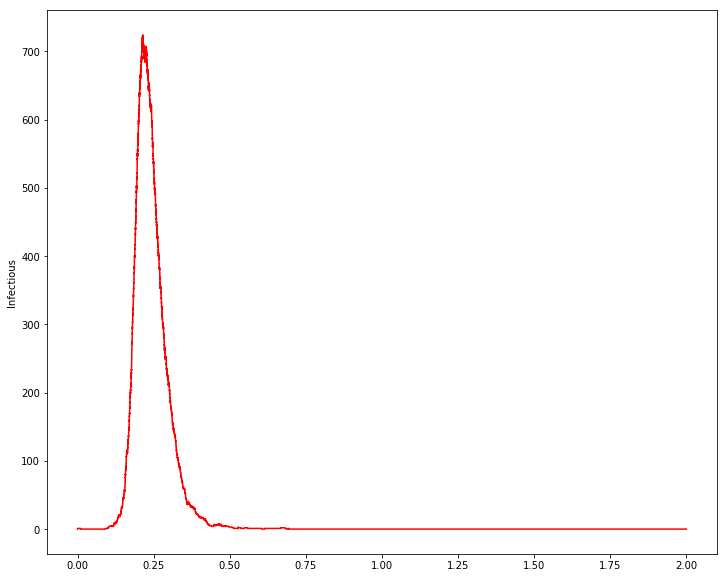

In [26]:
pl.figure(figsize=(12,10))
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.show()

In [21]:

import scipy.integrate as spi
N0=2618
mu=0
#mu=1/(70*365.0)
beta=1
sigma=1/12.0
gamma=1/10.0
ND=0.5*365.0
TS=1.0
S0=N0-1
E0=1
I0=0
R0=0
D0=0
mortality=334/2618
INPUT = (S0, E0, I0,R0,D0)

def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((5))
	V = INP    
	Y[0] = mu - beta * V[0] * V[2] - mu * V[0]
	Y[1] = beta * V[0] * V[2] - sigma * V[1] - mu * V[1]
	Y[2] = sigma * V[1] - gamma * V[2] - mu * V[2] -mortality*V[2]
	Y[3] = gamma * V[2] - mu * V[3]
	Y[4] = mortality*V[2]   
	return Y   # For odeint



t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)


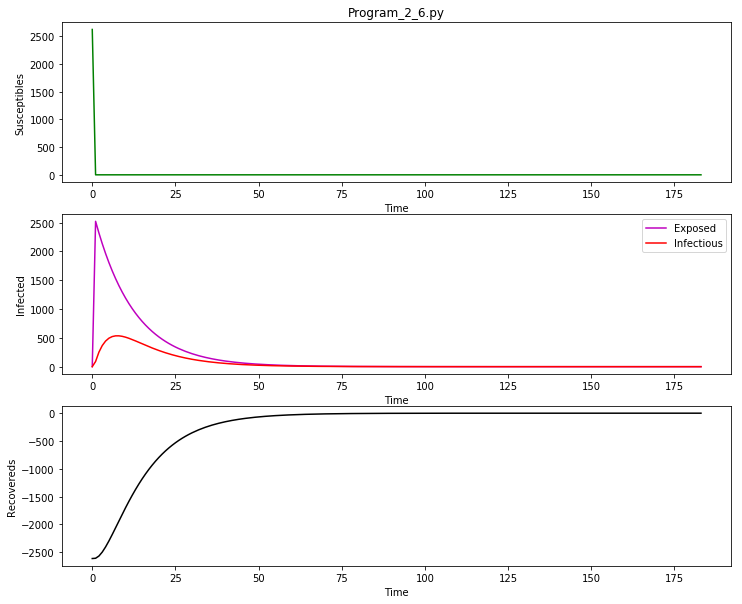

In [22]:
Rec=1. - (RES[:,0]+RES[:,1]+RES[:,2])

pl.figure(figsize=(12,10))
#Ploting
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_6.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-m', label='Exposed')
pl.plot(RES[:,2], '-r', label='Infectious')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infected')
pl.subplot(313)
pl.plot(Rec, '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()

In [ ]:
N0=2618
mu=0
#mu=1/(70*365.0)
beta_range=100
beta_val=np.linspace(0.1,3.0,beta_range)
beta=1
sigma=1/12.0
gamma=1/10.0
ND=0.5*365.0
TS=1.0
S0=N0-1
E0=1
I0=0
R0=0
D0=0
mortality=334/2618
INPUT = (S0, E0, I0,R0,D0)

def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((5))
	V = INP    
	Y[0] = mu - beta * V[0] * V[2] - mu * V[0]
	Y[1] = beta * V[0] * V[2] - sigma * V[1] - mu * V[1]
	Y[2] = sigma * V[1] - gamma * V[2] - mu * V[2] -mortality*V[2]
	Y[3] = gamma * V[2] - mu * V[3]
	Y[4] = mortality*V[2]   
	return Y   # For odeint



t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)


In [2]:
mort

0.12757830404889228

In [3]:
runs=20
mort=334/26180
beta_range=100
deaths=np.zeros((beta_range,runs))
beta_val=np.linspace(0.1,3.0,beta_range)
length_outbreak=np.zeros((beta_range,runs))
W0=N0-1
X0=1
Y0=0
Z0=0
D0=0
INPUT = np.array((W0,X0,Y0,Z0,D0))
timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((5))
	Change=np.zeros((5,5))
	N=np.sum(V[range(5)])
	Rate[0] = beta*V[0]*V[2]/N; Change[0,:]=([-1, +1, 0, 0,0]);
	Rate[1] = sigma*V[1];  Change[1,:]=([0, -1, +1, 0,0]);
	Rate[2] = gamma*V[2];  Change[2,:]=([0, 0,-1, +1,0]);
# 	Rate[3] = mu*N;  Change[3,:]=([+1, 0, 0, 0]);
# 	Rate[4] = mu*V[0];  Change[4,:]=([-1, 0, 0, 0]);
# 	Rate[5] = mu*V[1];  Change[5,:]=([0, -1, 0, 0]);
# 	Rate[6] = mu*V[2];  Change[6,:]=([0, 0, -1, 0]);
# 	Rate[7] = mu*V[3];  Change[7,:]=([0, 0, 0, -1]);
	Rate[4] = mort*V[2];  Change[4,:]=([0, 0, -1, 0,+1]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	m=min(pl.find(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
	V[range(5)]=V[range(5)]+Change[m,:]
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	E=[0]
	I=[0]
	R=[0]
	D=[0]
	while T[lop] < ND:
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		E.append(INPUT[1])
		I.append(INPUT[2])
		R.append(INPUT[3])
		D.append(INPUT[4])       
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		E.append(INPUT[1])
		I.append(INPUT[2])
		R.append(INPUT[3])
		D.append(INPUT[4]) 
	return [T,S,E,I,R,D]
for i in range(beta_range):
    beta=beta_val[i]
    for j in range(runs):
        ND=MaxTime=1*365.0
        mort=334/2618
        # X0=pl.floor(gamma*N0/beta)
        # Y0=pl.ceil(mu*N0/gamma)
        # Z0=N0-X0-Y0
        W0=N0-1
        X0=1
        Y0=0
        Z0=0
        D0=0
        INPUT = np.array((W0,X0,Y0,Z0,D0))
        
        [T,S,E,I,R,D]=Stoch_Iteration(INPUT)
        length_outbreak[i,j]=T[-5]
        deaths[i,j]=R[-5]

/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [54]:
length_outbreak

array([[  1.12143833e+01,   3.03976809e+02,   2.67644208e+02,
          4.71885352e+00,   2.42289309e+02],
       [  2.00197824e+01,   2.58520355e+02,   1.80282536e+01,
          2.56031268e+02,   2.61377591e+02],
       [  4.65171423e+00,   2.60560925e+02,   2.68856607e+02,
          1.99583586e+02,   1.84334008e+01],
       [  2.04678180e+02,   2.50515390e+02,   2.23731471e+02,
          2.33869546e+02,   2.78904317e+02],
       [  1.30052992e+01,   6.77980840e+01,   6.88994531e+00,
          1.46627434e+00,   1.94097454e+00],
       [  2.01213396e+02,   7.25842329e+00,   8.95874270e+00,
          2.10676282e+02,   1.95624335e+02],
       [  2.58035215e+02,   2.00927852e+02,   7.72752364e+00,
          1.89576109e+02,   3.66362840e+00],
       [  1.95104220e+02,   2.11362902e+02,   2.47660306e+02,
          2.46788026e+01,   2.10576073e+02],
       [  2.40764508e+02,   1.97468498e+02,   2.78385657e+02,
          2.01309021e+02,   1.99152566e+02],
       [  2.04175789e+02,   1.9800458

In [4]:
length_mean=np.zeros(beta_range)
deaths_mean=np.zeros(beta_range)
for i in range(beta_range):
    length_mean[i]=np.mean(length_outbreak[i,:])
    deaths_mean[i]=np.mean(deaths[i,:])

In [5]:
r0=beta_val*(1/(gamma+mort))

/home/susanna/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


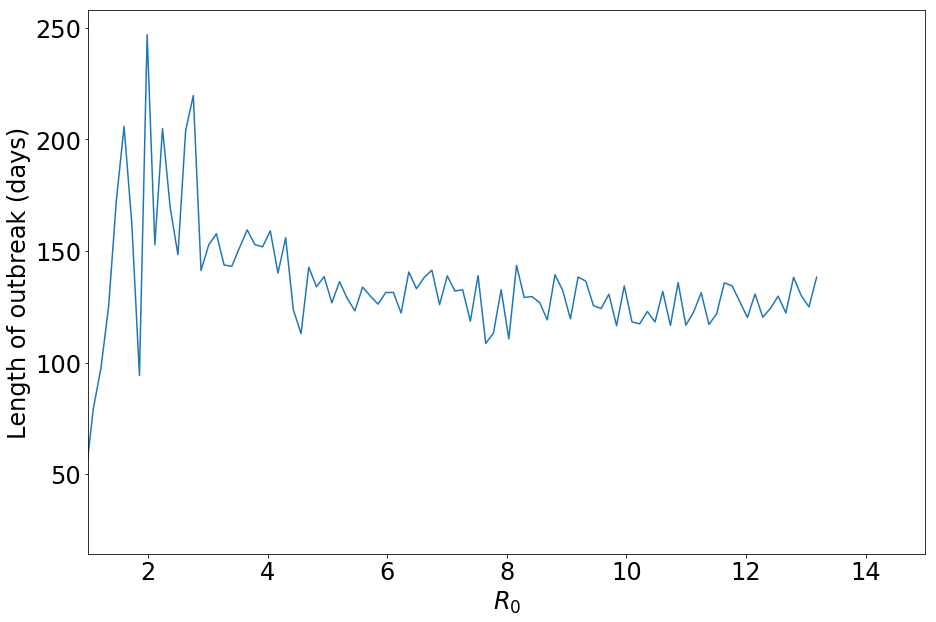

In [6]:
pl.figure(figsize=(15,10))
pl.rcParams.update({'font.size': 24})
pl.plot(r0,length_mean)
pl.xlabel("$R_0$")
pl.ylabel("Length of outbreak (days)")
#pl.plot(beta_val*10,length_mean[0:10],'r',label="RO small")
pl.legend()
pl.xlim((1,15))
pl.show()

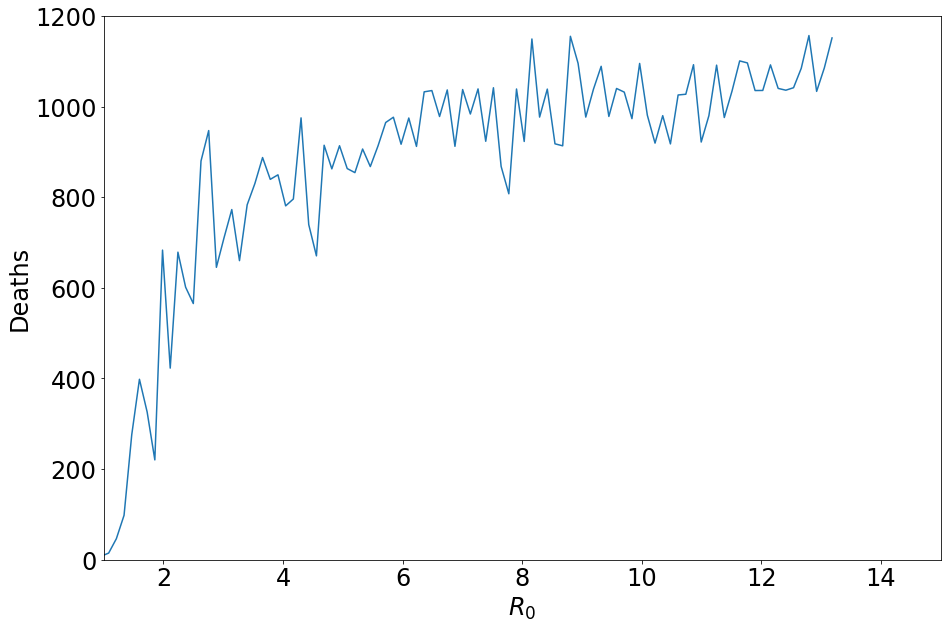

In [7]:
pl.figure(figsize=(15,10))

pl.plot(r0,deaths_mean)
pl.ylabel("Deaths")
pl.xlabel("$R_0$")
pl.ylim((0,1200))
pl.xlim((1,15))
pl.show()

In [52]:
T[-5]

127.42880671348144

In [83]:
mort

0.12757830404889228

In [84]:
334/2618

0.12757830404889228